In [1]:
using LinearAlgebra
using Plots
using LaTeXStrings
using DelimitedFiles
using Polynomials
using Statistics


In [2]:
### Primero construimos la base de Fock
# Necesito la Combinatoria eso es con la funcion binomial(N,k)

In [3]:
fnt = Plots.font("sans-serif", 10) # Para gráficar loas labels


Plots.Font("sans-serif", 10, :hcenter, :vcenter, 0.0, RGB{N0f8}(0.0,0.0,0.0))

In [101]:
N=1
M=4
J=1.0
CASOS_4=[[[3 0 0 3 0 0],[4]],
        [[3 0 3 0],[3]],
        [[1 1 1 1 1 1],[4]],
        [[3 3 0 0 0 0],[2]]]

CASOS_4=[[[6 0],[2]],
        [[3 3 0],[2]],
        [[6 0 0],[2]],
        [[3 3 0 0 ],[2]],
        [[0 0 6 0 ],[2]],
        [[6 0 0 0 0 0],[2]]]
CASOS_4=[[[4 0 0 0 0 0],[2]], [[2 0 0 2 0 0],[2]], [[4 0 0 0 0 0],[3]],[[2 0 0 2 0 0],[3]],[[4 0 0 0 0 0],[4]],[[2 0 0 2 0 0],[4]]]
CASOS_4=[[[2 0 0 2],[3]], [[1 1 1 1],[3]]]
CASOS_4=[
        [[1 0 0 0 0 0],[2]], [[1 0 0 0 0 0],[3]], [[1 0 0 0 0 0],[4]]
        ]

3-element Vector{Vector{Array{Int64}}}:
 [[1 0 … 0 0], [2]]
 [[1 0 … 0 0], [3]]
 [[1 0 … 0 0], [4]]

In [102]:
(CASOS_4[3][2])[1]

4

In [103]:
# for i=1:length(CASOS_4)
#     println((CASOS_4[i][2])[1])
# end

# sum(CASOS_4[3][1])

In [104]:
NAMES=Vector{String}(undef,length(CASOS_4))
NAMES_stylo=Vector{String}(undef,length(CASOS_4))

for i=1:length(CASOS_4)
    name1=""
    name2=""
    for j=1:length(CASOS_4[i][1])
        name1=name1*string((CASOS_4[i][1])[j])
        if j==1 || j==(CASOS_4[i][2])[1]
            name2=name2*L"\mathbf{%$((CASOS_4[i][1])[j])}"
        else
            name2=name2*L"%$((CASOS_4[i][1])[j])"
        end
    end
    NAMES[i]=name1
    NAMES_stylo[i]=name2
end

In [105]:
direcciones=Vector{String}(undef,length(CASOS_4))
for i=1:length(CASOS_4)
    direccion="./Caso_N$(sum(CASOS_4[i][1]))_M$(length(CASOS_4[i][1]))"
    NC=(CASOS_4[i][2])[1]
    if NC==2
        direccion=direccion*"/Contiguos/Negativity_nm$(NC)_nn1__J$(J)_$(NAMES[i]).dat"
    elseif NC==3
        direccion=direccion*"/No_contiguos_1/Negativity_nm$(NC)_nn1__J$(J)_$(NAMES[i]).dat"
    elseif NC==4
        direccion=direccion*"/No_contiguos_2/Negativity_nm$(NC)_nn1__J$(J)_$(NAMES[i]).dat"    
    end    
    direcciones[i]=direccion
end
direcciones

3-element Vector{String}:
 "./Caso_N1_M6/Contiguos/Negativity_nm2_nn1__J1.0_100000.dat"
 "./Caso_N1_M6/No_contiguos_1/Negativity_nm3_nn1__J1.0_100000.dat"
 "./Caso_N1_M6/No_contiguos_2/Negativity_nm4_nn1__J1.0_100000.dat"

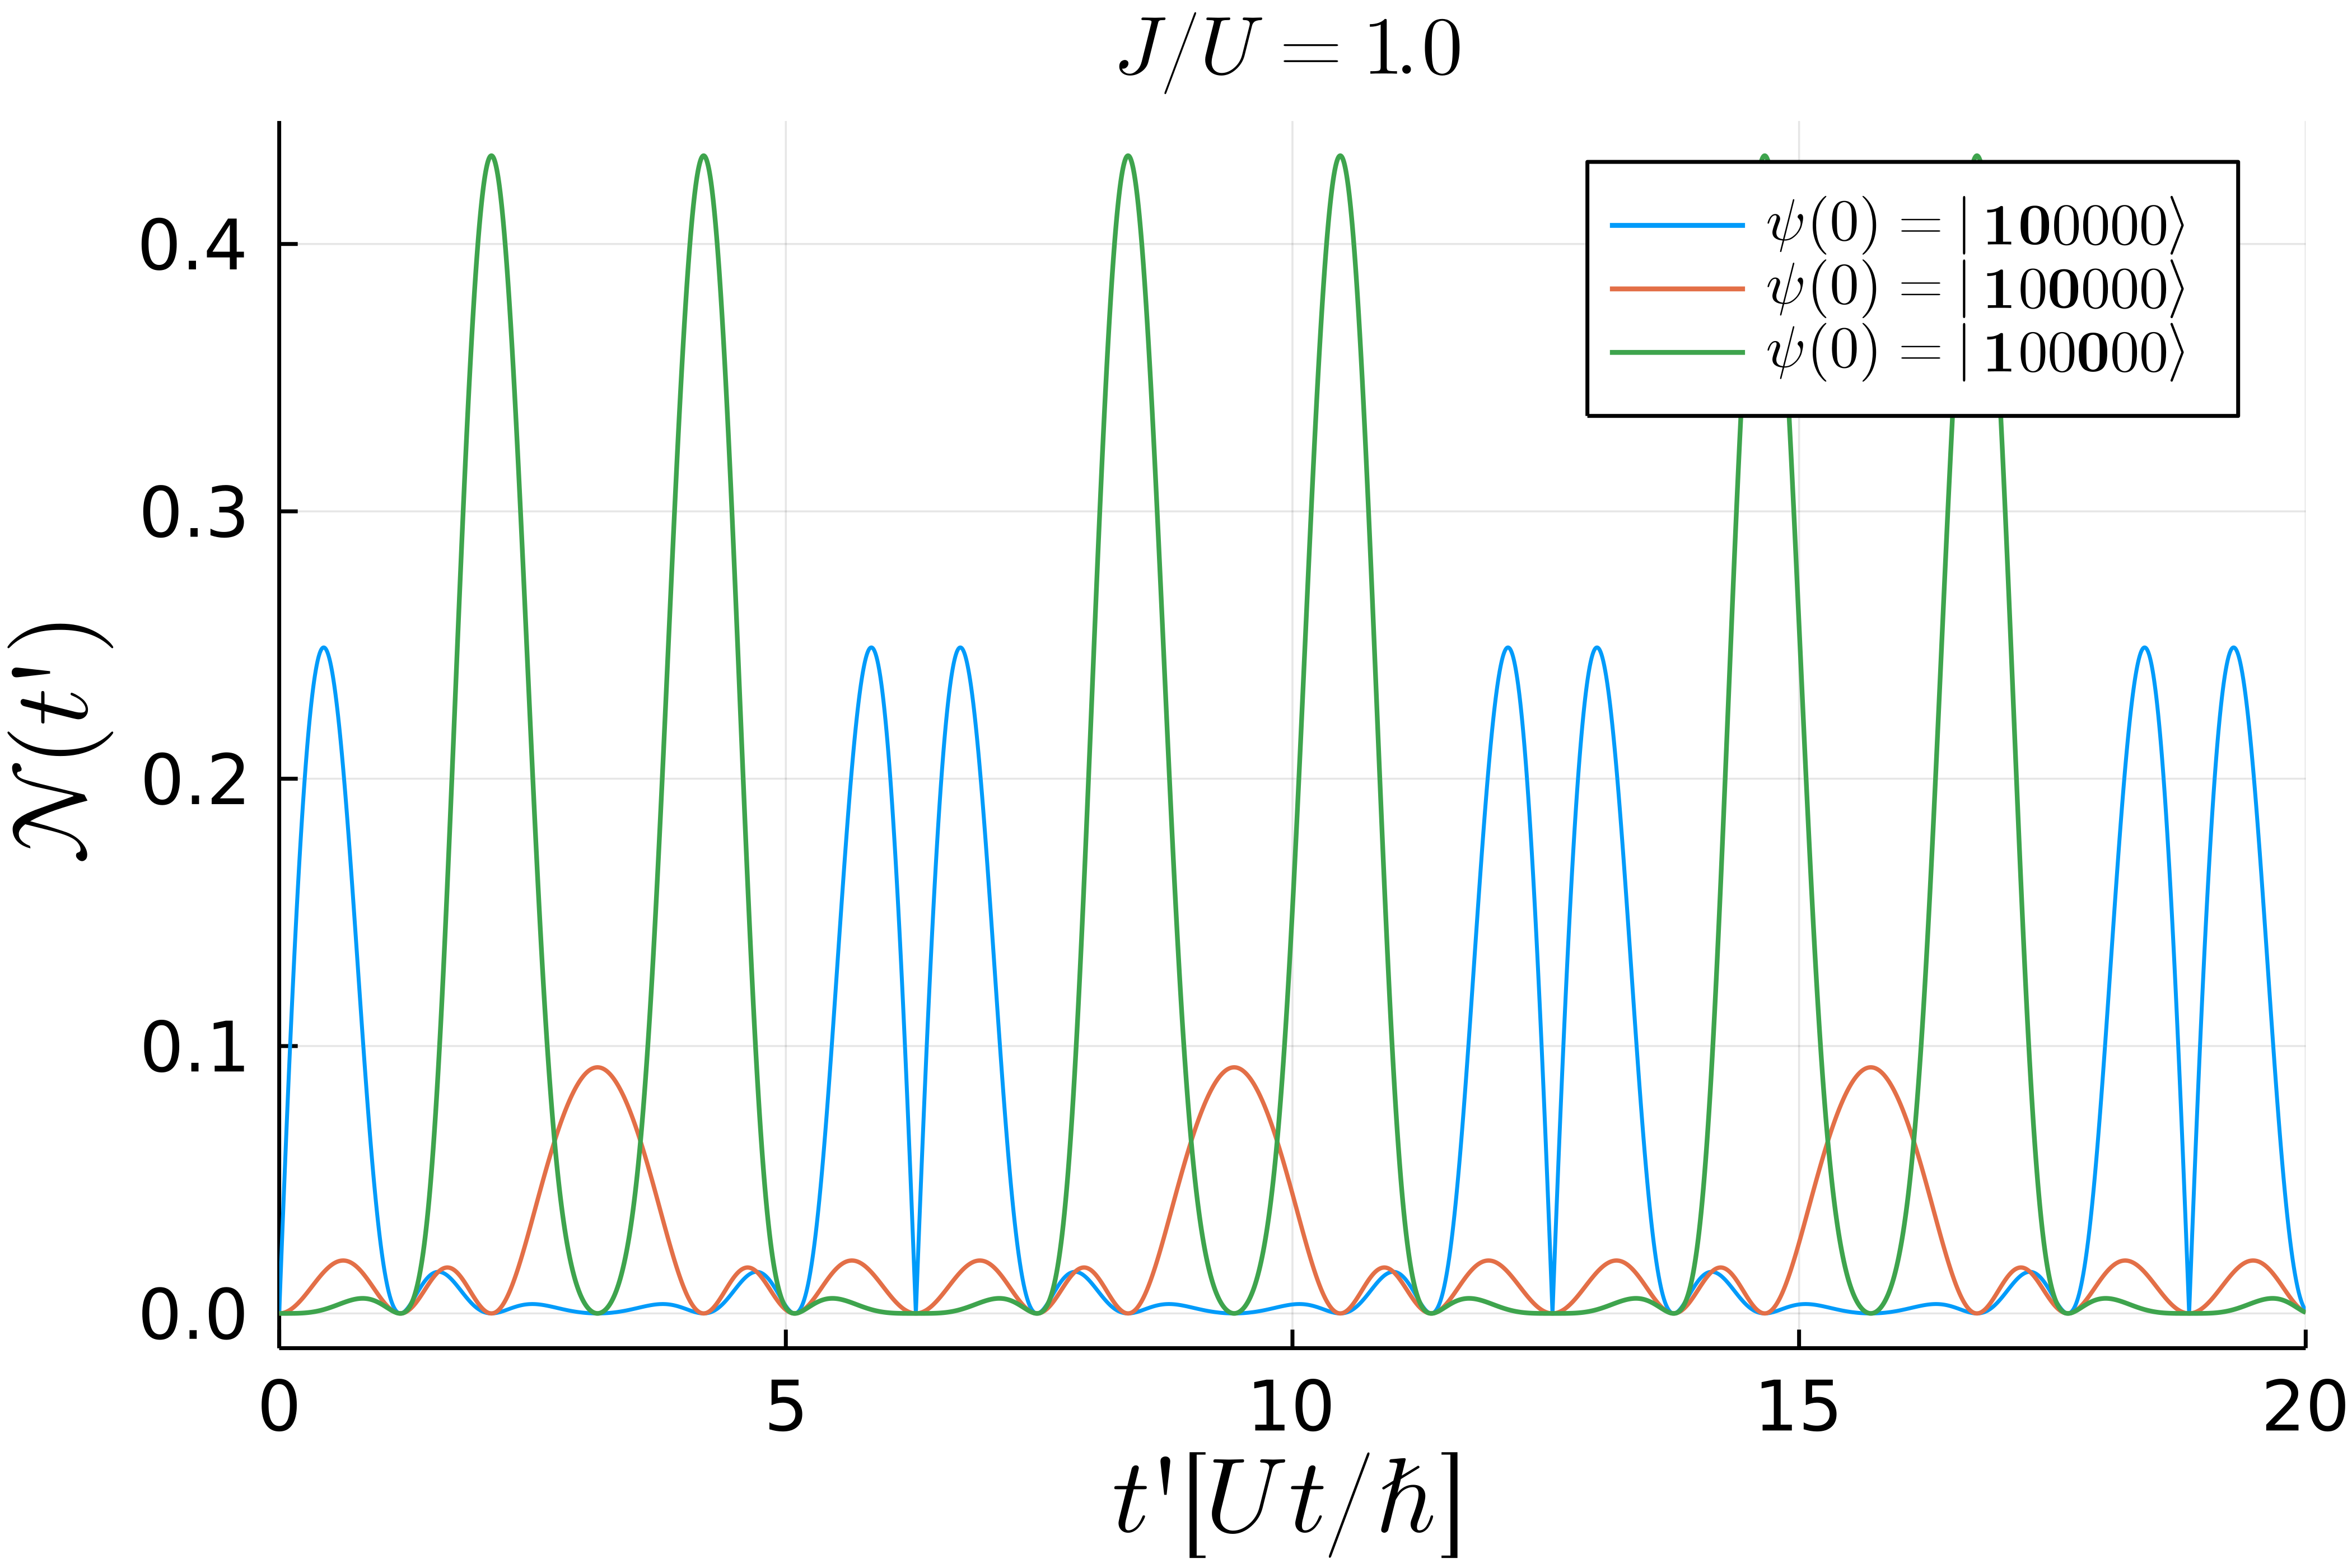

In [106]:
plot(uidefont=fnt,fmt = :png, dpi=700.,
    ylabel=L"\mathcal{N}(t')",xlabel=L"t'[Ut/\hbar]",title=L"J/U=%$(J)",#title=L"N=%$N, M=%$M,  J/U=%$(J)",
    legend=:best,legendfontsize=10,
    xlims=(0,20),tickfontsize=12,
    guidefontsize=18)
    #size = (500, 500))
for i=1:length(CASOS_4)
    DATA_N=readdlm(direcciones[i])
    #plot!(DATA_N[:,1],DATA_N[:,2],label=L"\psi(0)=|"*NAMES_stylo[i]*L"\rangle",lw=1.0+(i-1)*(2.15))
    if i==-1
         plot!(DATA_N[:,1],DATA_N[:,2],label=L"\psi(0)=|"*NAMES_stylo[i]*L"\rangle",lw=1.0+(i-1)*(1.15),linestyle=:dash)
    else
        plot!(DATA_N[:,1],DATA_N[:,2],label=L"\psi(0)=|"*NAMES_stylo[i]*L"\rangle",lw=1.0+(i-1)*(0.1))
    end
end
plot!()

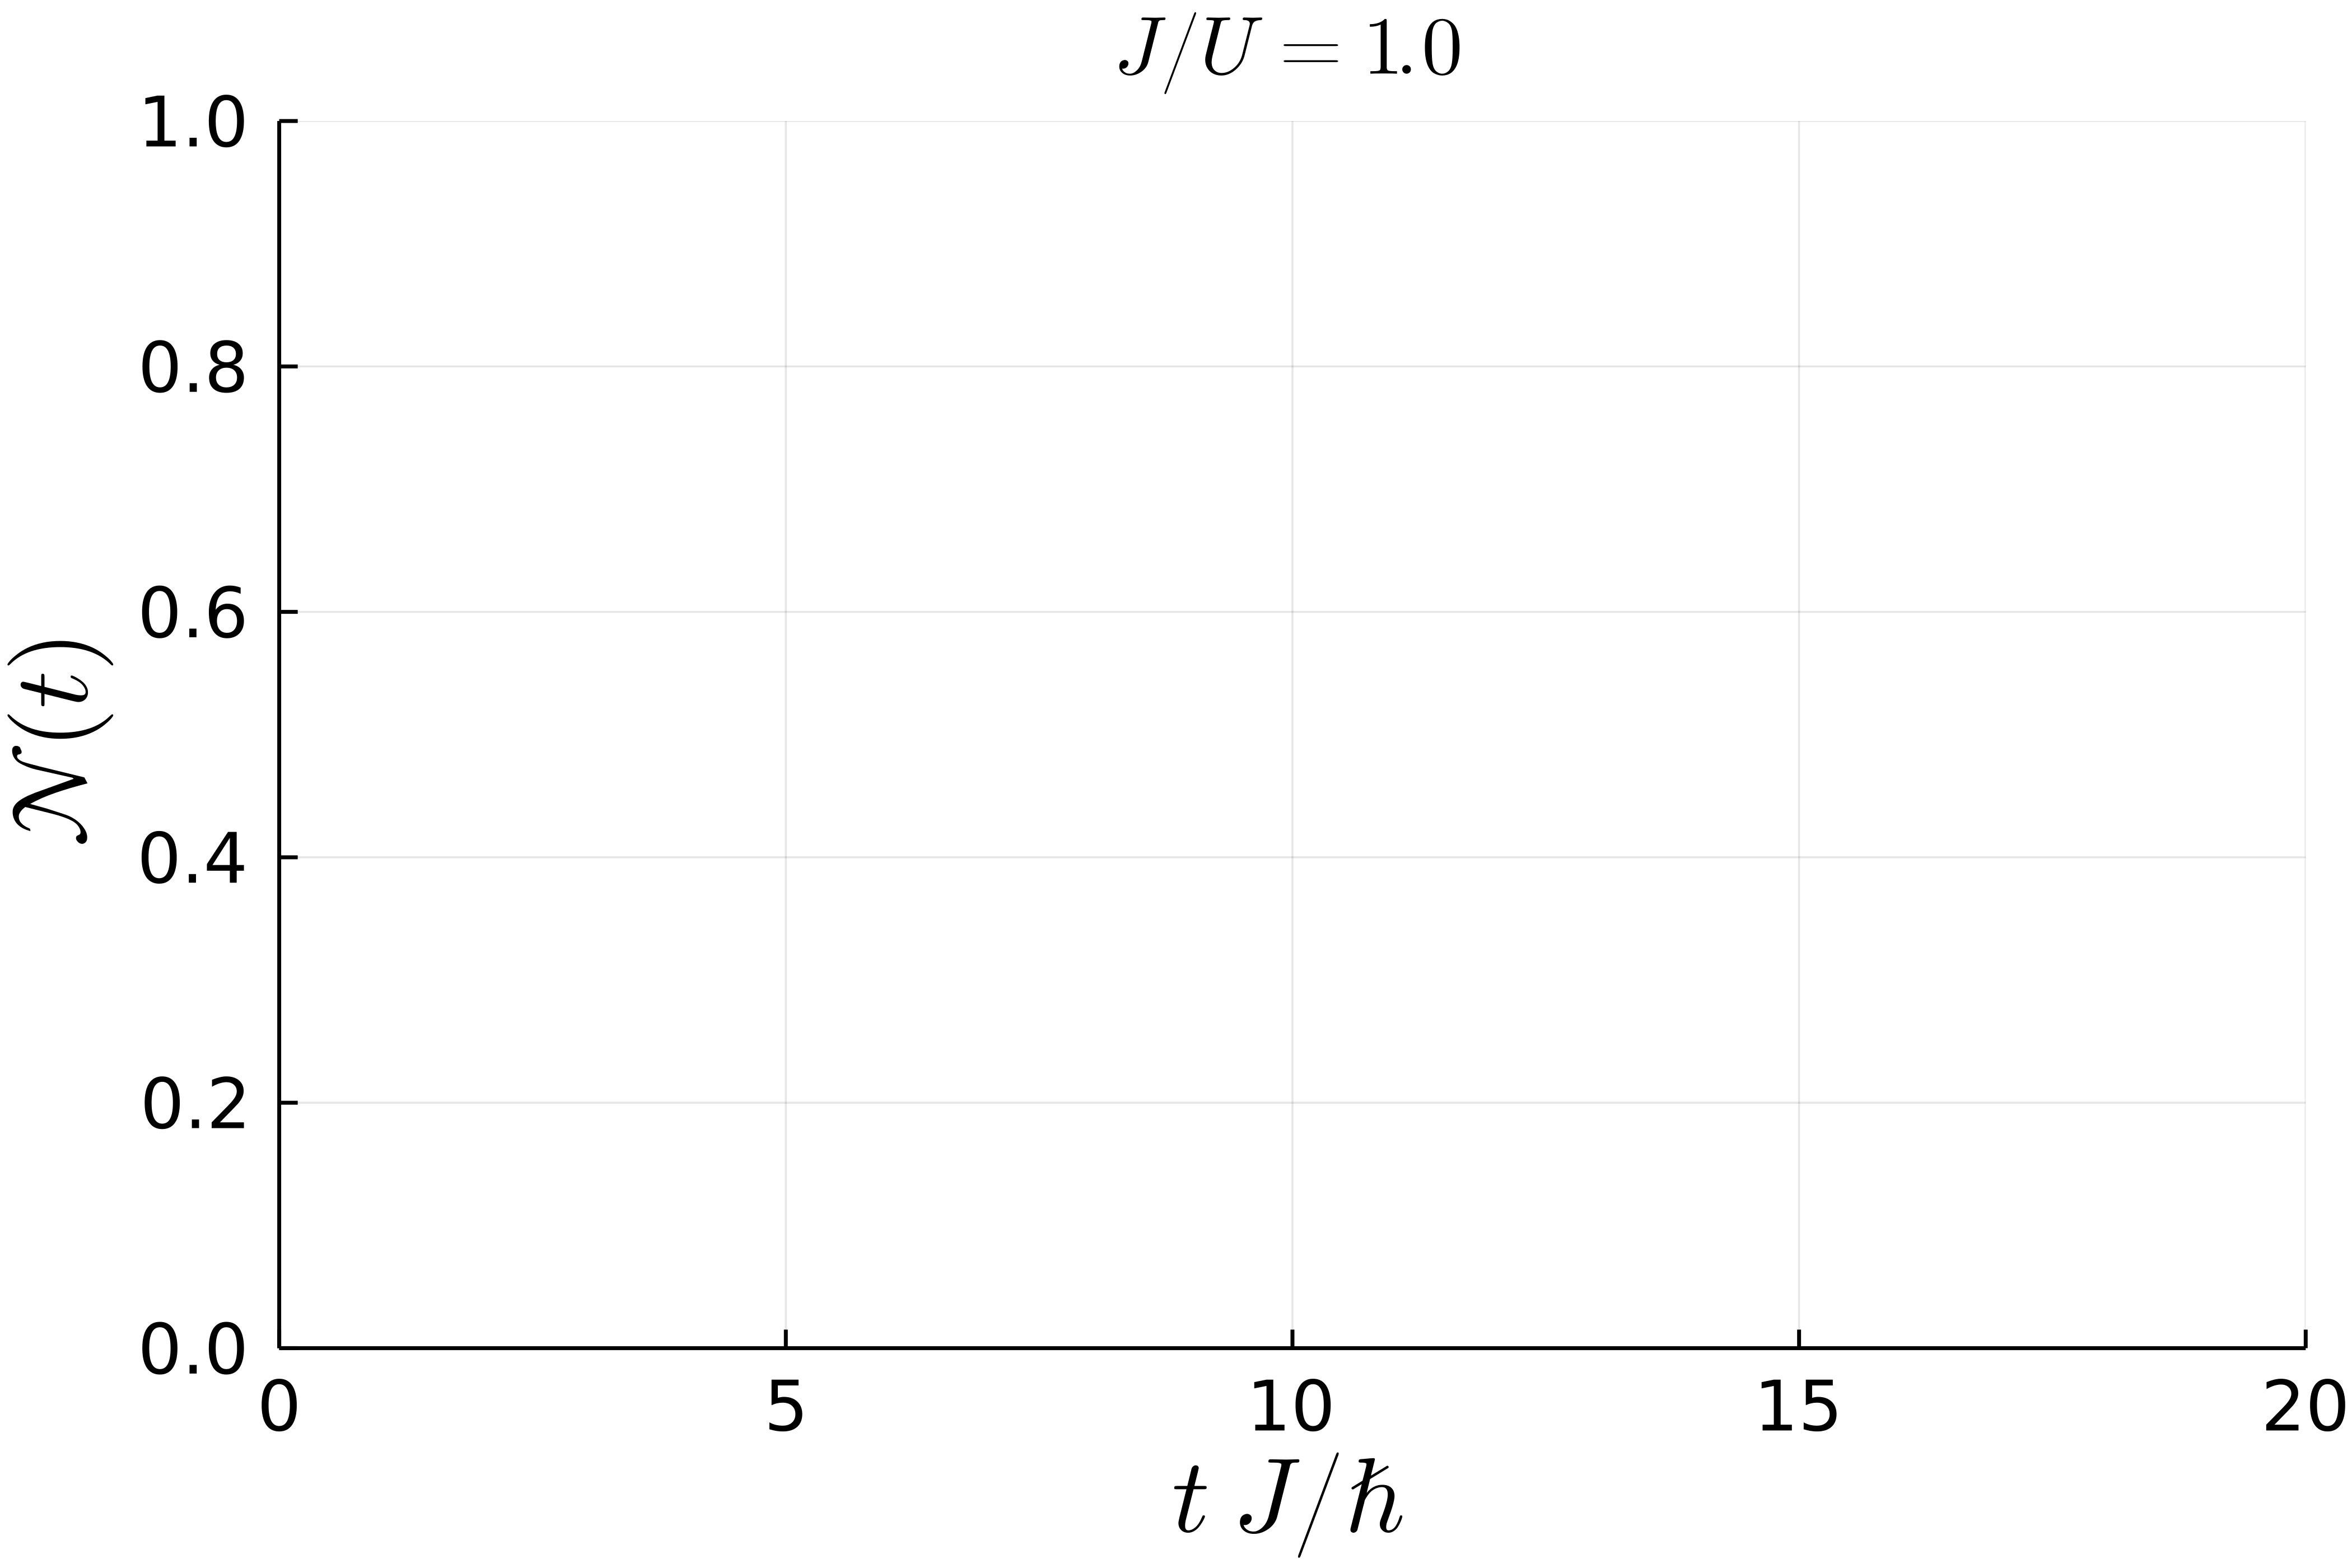

In [9]:
plot(uidefont=fnt,fmt = :png, dpi=700.,
    ylabel=L"\mathcal{N}(t)",xlabel=L"t\,\,J/\hbar",title=L"J/U=%$(J)",#title=L"N=%$N, M=%$M,  J/U=%$(J)",
    legend=:best,legendfontsize=10,
    xlims=(0,20),tickfontsize=12,
    guidefontsize=18)

In [10]:
savefig("./Tesis_figuras/Plantilla1.svg")

In [64]:
N=10
M=4

Casos_J=[0.1,0.5,0.25,1.0,2.5,5.0,10.0]
Casos_J=[10.0,5.0,2.5,1.0,0.25,0.5,0.1]
Casos_J=[0.01,0.05,0.1,0.5,1.0,10.0]

Caso=[[5 0 5 0 ],[2]]


2-element Vector{Array{Int64}}:
 [5 0 5 0]
 [2]

In [65]:
typeof(Caso[2][1])

Int64

In [66]:
Name_stylo=""
Name=""
for i=1:M
    Name=Name*string(Caso[1][i])
    if i==Caso[2][1] || i==1
        Name_stylo=Name_stylo*L"\mathbf{%$(Caso[1][i])}"
    else
        Name_stylo=Name_stylo*L"%$(Caso[1][i])"
    end
end

In [67]:
direcciones=Vector{String}(undef,length(Casos_J))

for i=1:length(Casos_J)
    direccion=""
    if Caso[2][1]==2
        direccion="./Caso_N$(N)_M$(M)/Contiguos/Negativity_nm$(Caso[2][1])_nn1__J$(Casos_J[i])_$(Name).dat"
    elseif Caso[2][1]==3
        direccion="./Caso_N$(N)_M$(M)/No_contiguos_1/Negativity_nm$(Caso[2][1])_nn1__J$(Casos_J[i])_$(Name).dat"
    elseif Caso[2][1]==4
        direccion="./Caso_N$(N)_M$(M)/No_contiguos_2/Negativity_nm$(Caso[2][1])_nn1__J$(Casos_J[i])_$(Name).dat"
    end
    direcciones[i]=direccion
end
direcciones

6-element Vector{String}:
 "./Caso_N10_M4/Contiguos/Negativity_nm2_nn1__J0.01_5050.dat"
 "./Caso_N10_M4/Contiguos/Negativity_nm2_nn1__J0.05_5050.dat"
 "./Caso_N10_M4/Contiguos/Negativity_nm2_nn1__J0.1_5050.dat"
 "./Caso_N10_M4/Contiguos/Negativity_nm2_nn1__J0.5_5050.dat"
 "./Caso_N10_M4/Contiguos/Negativity_nm2_nn1__J1.0_5050.dat"
 "./Caso_N10_M4/Contiguos/Negativity_nm2_nn1__J10.0_5050.dat"

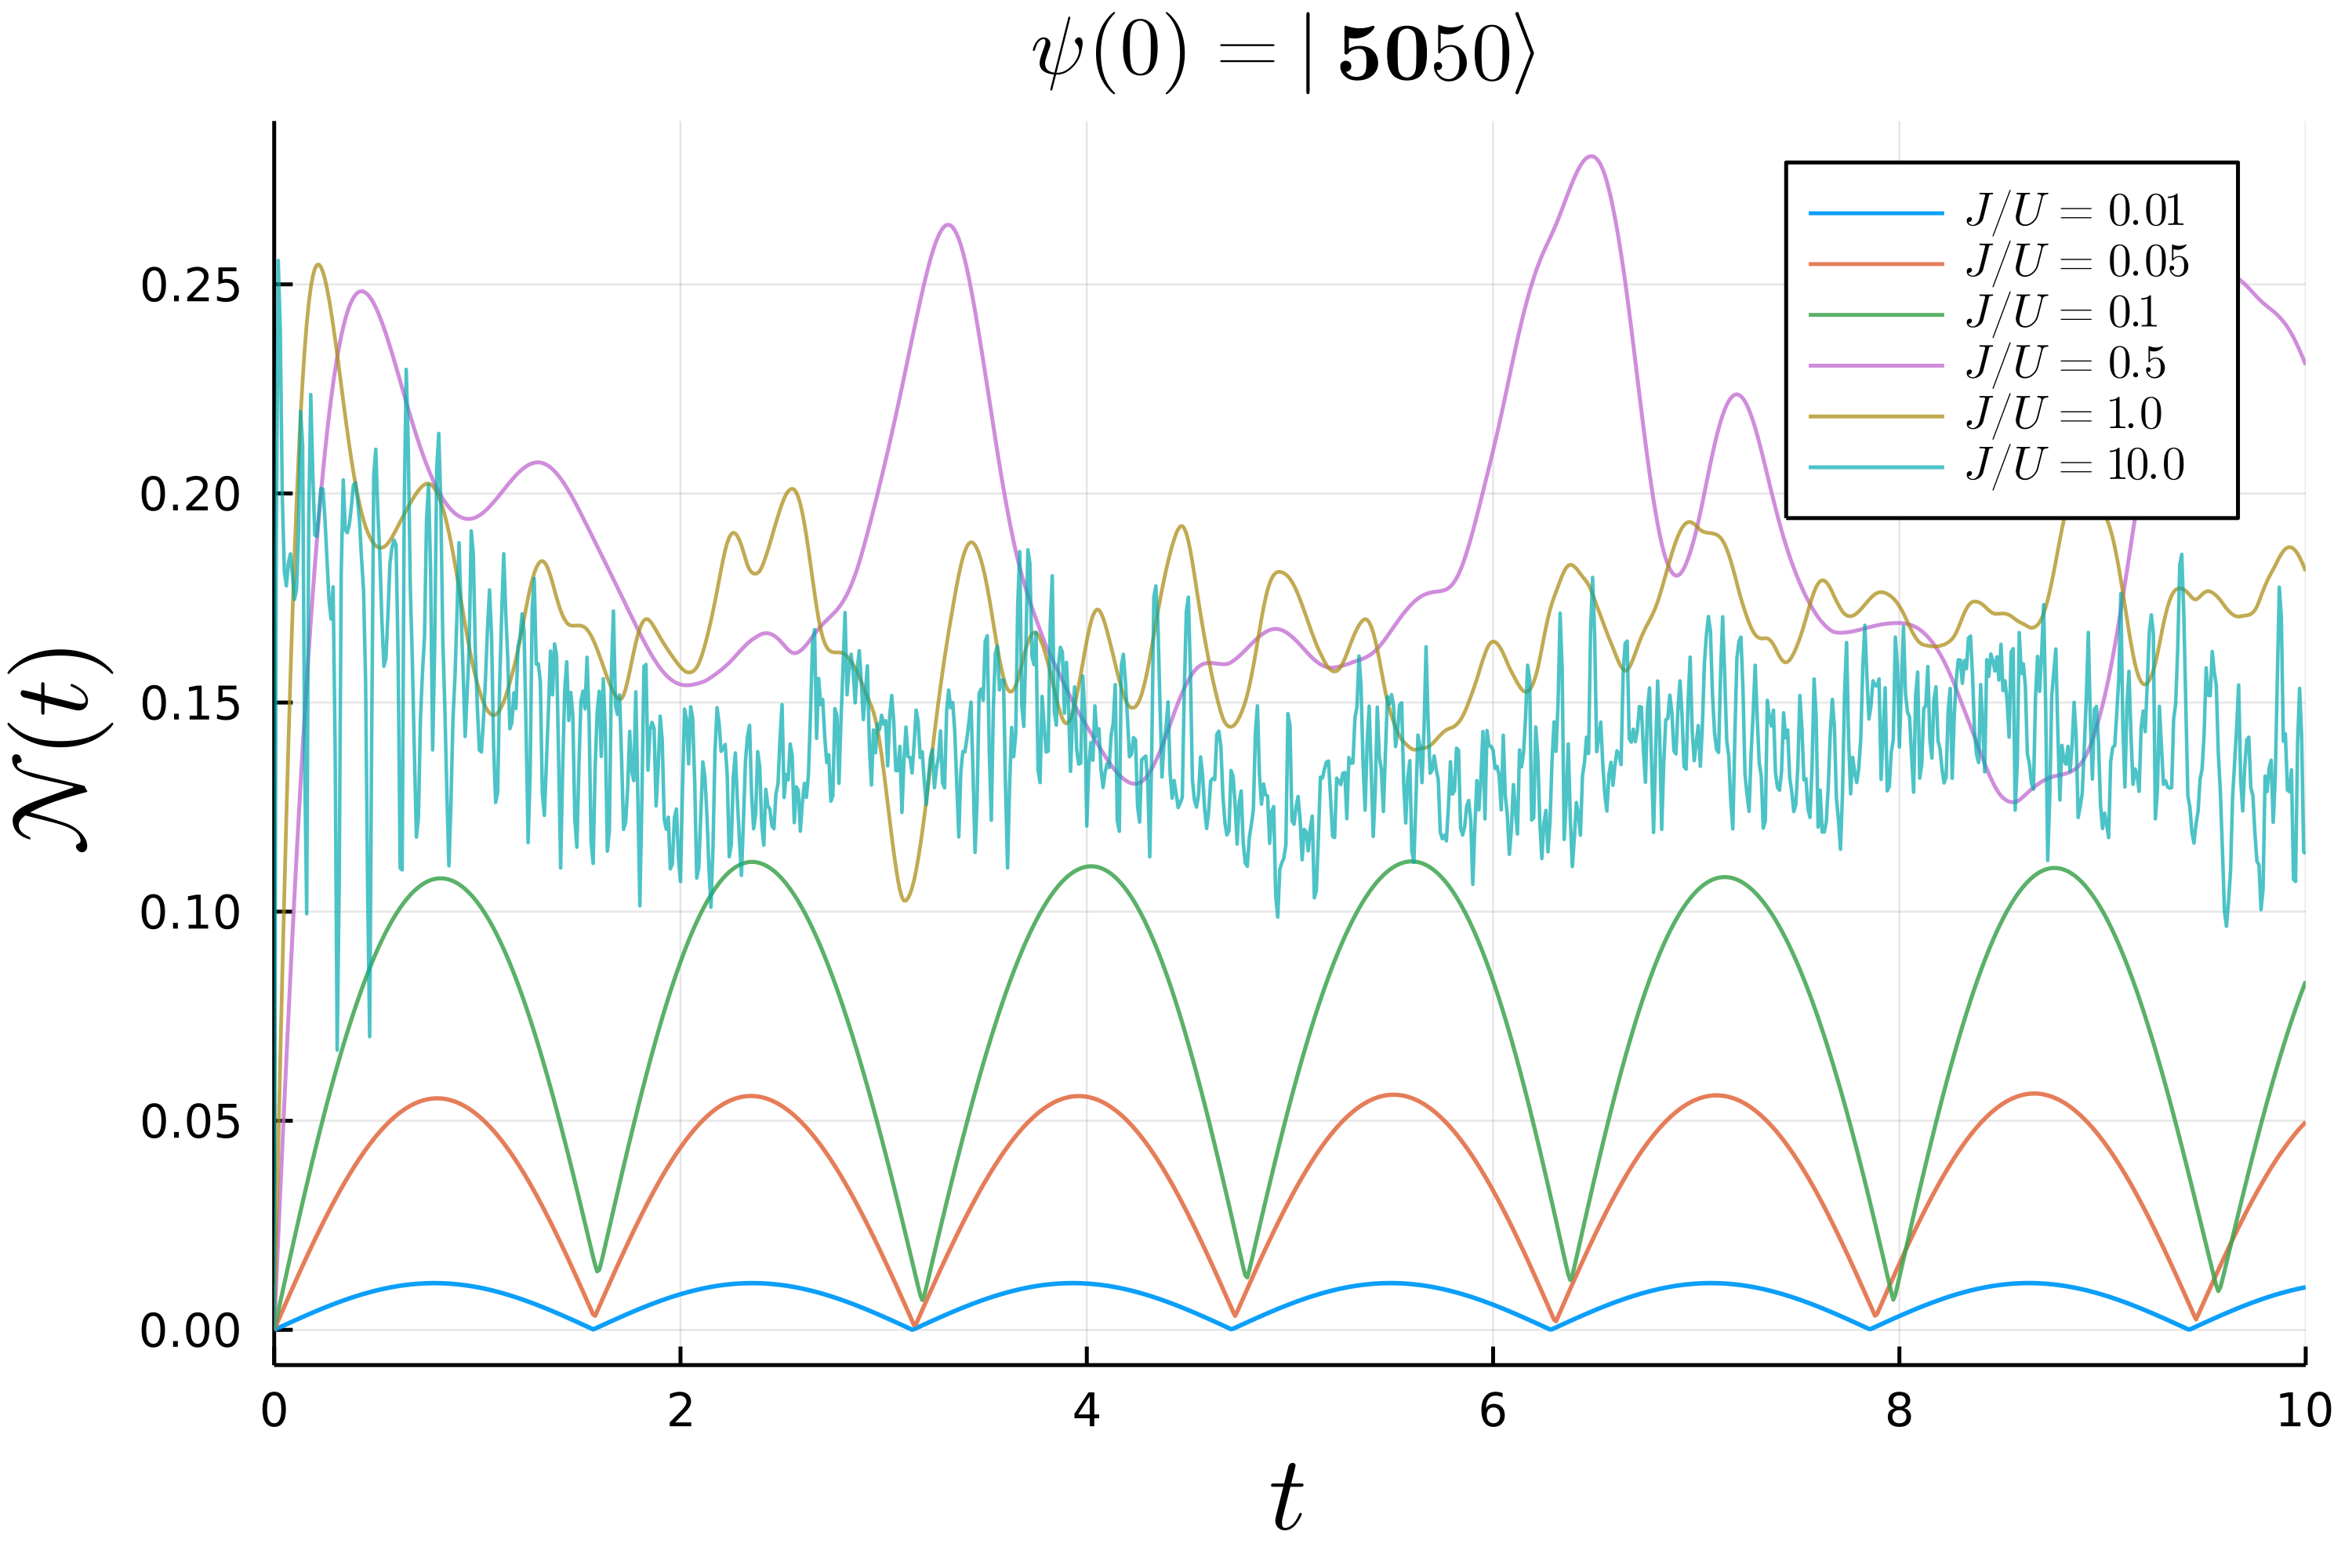

In [68]:
plot(uidefont=fnt,fmt = :png, dpi=500.,
    ylabel=L"\mathcal{N}(t)",xlabel=L"t",title=L"\psi(0)=|"*Name_stylo*L"\rangle",#title=L"N=%$N, M=%$M,  J/U=%$(J)",
    legend=:best, legendcolumns=2,legendfontsize=8,
    xlims=(0,10),
    guidefontsize=18)
for i=1:length(Casos_J)
    DATA_N=readdlm(direcciones[i])
    plot!(DATA_N[:,1],DATA_N[:,2],label=L"J/U=%$(Casos_J[i])",lw=1.2-(i*0.05)*(1),alpha=1-(i*0.05)^(1))
end
plot!()

In [69]:
savefig("./Article_miguel_3.png")

3×3 Matrix{Int64}:
 1  0  0
 2  2  1
 4  3  1

In [53]:
function search_k(M::Int64,n::Vector{Int64})
    k=1 #iniciamos en la pos 1
    for i=1:M #Recorreremos todas las posisiciones M para checar las j>i
        k=i #Nuestro primer prospecto a ser j
        flag=0 #Definimos una bandera si es
                # 1--> significa que encontro una n_{j} tal que los de adelante son 0
                #0--> no lo ha encontrado
        for j=k+1:M-1 #Revisaremos los n_{j} j>i si son cero
            if n[j]!=0 # si encientra una n_{j}!=0
                break  # ya no revises más
            elseif (j == M-1) # si j llega al penultimo valor entonces
                flag=1 # ya lo encontró
            end
        end
        if flag==1 # si la bandera es 1, ya encontro la k
            k=i # entonces esa i es la k
            break # ya no hace falta revisar más
        end
    
    if k==M # si no encontro ningun valor entonces signfica que tomaremos el penultimo valor
        k=M-1
    end
        
    end
    
    return k
end

search_k (generic function with 1 method)

In [54]:
function base_fock(N::Int64,M::Int64)
    D=binomial(N+M-1,N) #declaramos la variable de la dimension del espacio de Hilbert
    DM=zeros(Int64,(D,M)) #Aquí se colocaran las bases
    n=zeros(Int64,M) #Este vector va a ser el que modificaremos y usaremos para sobre escribir cada fila de DM
    
    DM[1,1]=N #El primer estado de la base
    n[1]=N    # Coincidde con el estado base
    
    l=1 # es un contador para colocar los demas estados
     #k es el indice donde despues de ese todos son ceros
    
    while n[M]!=N
        l+=1 #incrementamos el contador
        k=search_k(M,n) #buscamos la k
        n[k]=n[k]-1 #Primer paso del cambio n_{k}=n_{k}-1
        #Compienza el segundo paso de la suma n_{k+1}=n_{k}-1
        n[k+1]=N

        for i=1:k
            n[k+1]=n[k+1]-n[i]
        end
        #Cambiamos por ceros los n_{i} tales que i>=k+2
        for i=k+2:M
            n[i]=0
        end
        #Agregamos el estado n a la fila l
        DM[l,:]=n
    end
    
    
    return DM;
    
end

base_fock (generic function with 1 method)

In [55]:
function Buscador(vector_base::Vector{Int64},N::Int64,M::Int64)

    i0=N #indice para ayudarnos a que este fijo el num de particulas disponibles
    i1=0 #indice para ayudarnos a restar
    Sitios=2 #Numero de sitios que se quitan +1 (al principio se quita un sitio por eso es 2)

    contador=1

    for j=1:M
        while i0-i1 != vector_base[j]
            contador=contador+binomial(M-Sitios+i1,i1)
            i1+=1
        end
        i0=i1
        i1=0
        Sitios+=1
    end

    return contador
end

Buscador (generic function with 1 method)

In [56]:
function nombre_carpeta(N::Int64,M::Int64,n_nu::Int64,n_mu::Int64)
    ####Creamos el directorio
    name_dir1="./Negativities_ring/Caso_N$(N)_M$(M)"
    name_dir2=""
    if n_nu==1 && n_mu==2
        name_dir2="/Contiguos/"
    else
        name_dir2="/No_Contiguos_$(n_nu+1-n_mu)/" #solo puedes seleccionar de M es par... n_mu=2,3,4...M/2 + 1
                                                 #solo puedes seleccionar de M es impar... n_mu=2,3,4...M-1/2 + 1
    end
    return directorio=name_dir1*name_dir2
end

function nombre_archivo(U::Float64,num_base::Int64,N::Int64,M::Int64,n_nu::Int64,n_mu::Int64)
    name1=""
    for j=1:M
        name1=name1*string(bases[num_base,j])
    end
    directorio=nombre_carpeta(N,M,n_nu,n_mu)
    return archivo=directorio*name1*"_nm$(n_mu)_nn$(n_nu)__U$(U)_fin.dat"
end


nombre_archivo (generic function with 1 method)

In [72]:
# Que queremos plotear??
# Diferentes "casos iniciales", con una U/J
n_nu=1
U=1.0
#La primera entrada es el caso, y la segunda es el sitio donde quiero que enrede con el primero
CASOS=[
        [[1,0,0],2], 
        [[1,0,0,0],2],
        [[1,0,0,0,0],2],
        [[1,0,0,0,0,0],2],
        [[1,0,0,0,0,0,0],2],
        [[1,0,0,0,0,0,0,0],2],
        [[1,0,0,0,0,0,0,0,0],2],
        [[1,0,0,0,0,0,0,0,0,0],2]
        ]

8-element Vector{Vector{Any}}:
 [[1, 0, 0], 2]
 [[1, 0, 0, 0], 2]
 [[1, 0, 0, 0, 0], 2]
 [[1, 0, 0, 0, 0, 0], 2]
 [[1, 0, 0, 0, 0, 0, 0], 2]
 [[1, 0, 0, 0, 0, 0, 0, 0], 2]
 [[1, 0, 0, 0, 0, 0, 0, 0, 0], 2]
 [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 2]

In [82]:
N=0
M=0
bases=0
num_base=0
n_mu=0


direcciones=Vector{String}(undef,length(CASOS))

for i=1:length(CASOS)
    N=sum(CASOS[i][1])
    N==1 ? U=0.0 : nothing

    M=length(CASOS[i][1])
    bases=base_fock(N,M)
    num_base=Buscador(CASOS[i][1],N,M)
    n_mu=CASOS[i][2]
    archivo=nombre_archivo(U,num_base,N,M,n_nu,n_mu)
    #println(isfile(archivo))
    direcciones[i]=archivo
end

NAMES_stylo=Vector{String}(undef,length(CASOS))
for i=1:length(CASOS)
    name=""
    for j=1:length(CASOS[i][1])
        if j==1 || j==CASOS[i][2]
            name=name*L"\mathbf{%$((CASOS[i][1])[j])}"
        else
            name=name*L"%$((CASOS[i][1])[j])"
        end
    end
    NAMES_stylo[i]=name
end

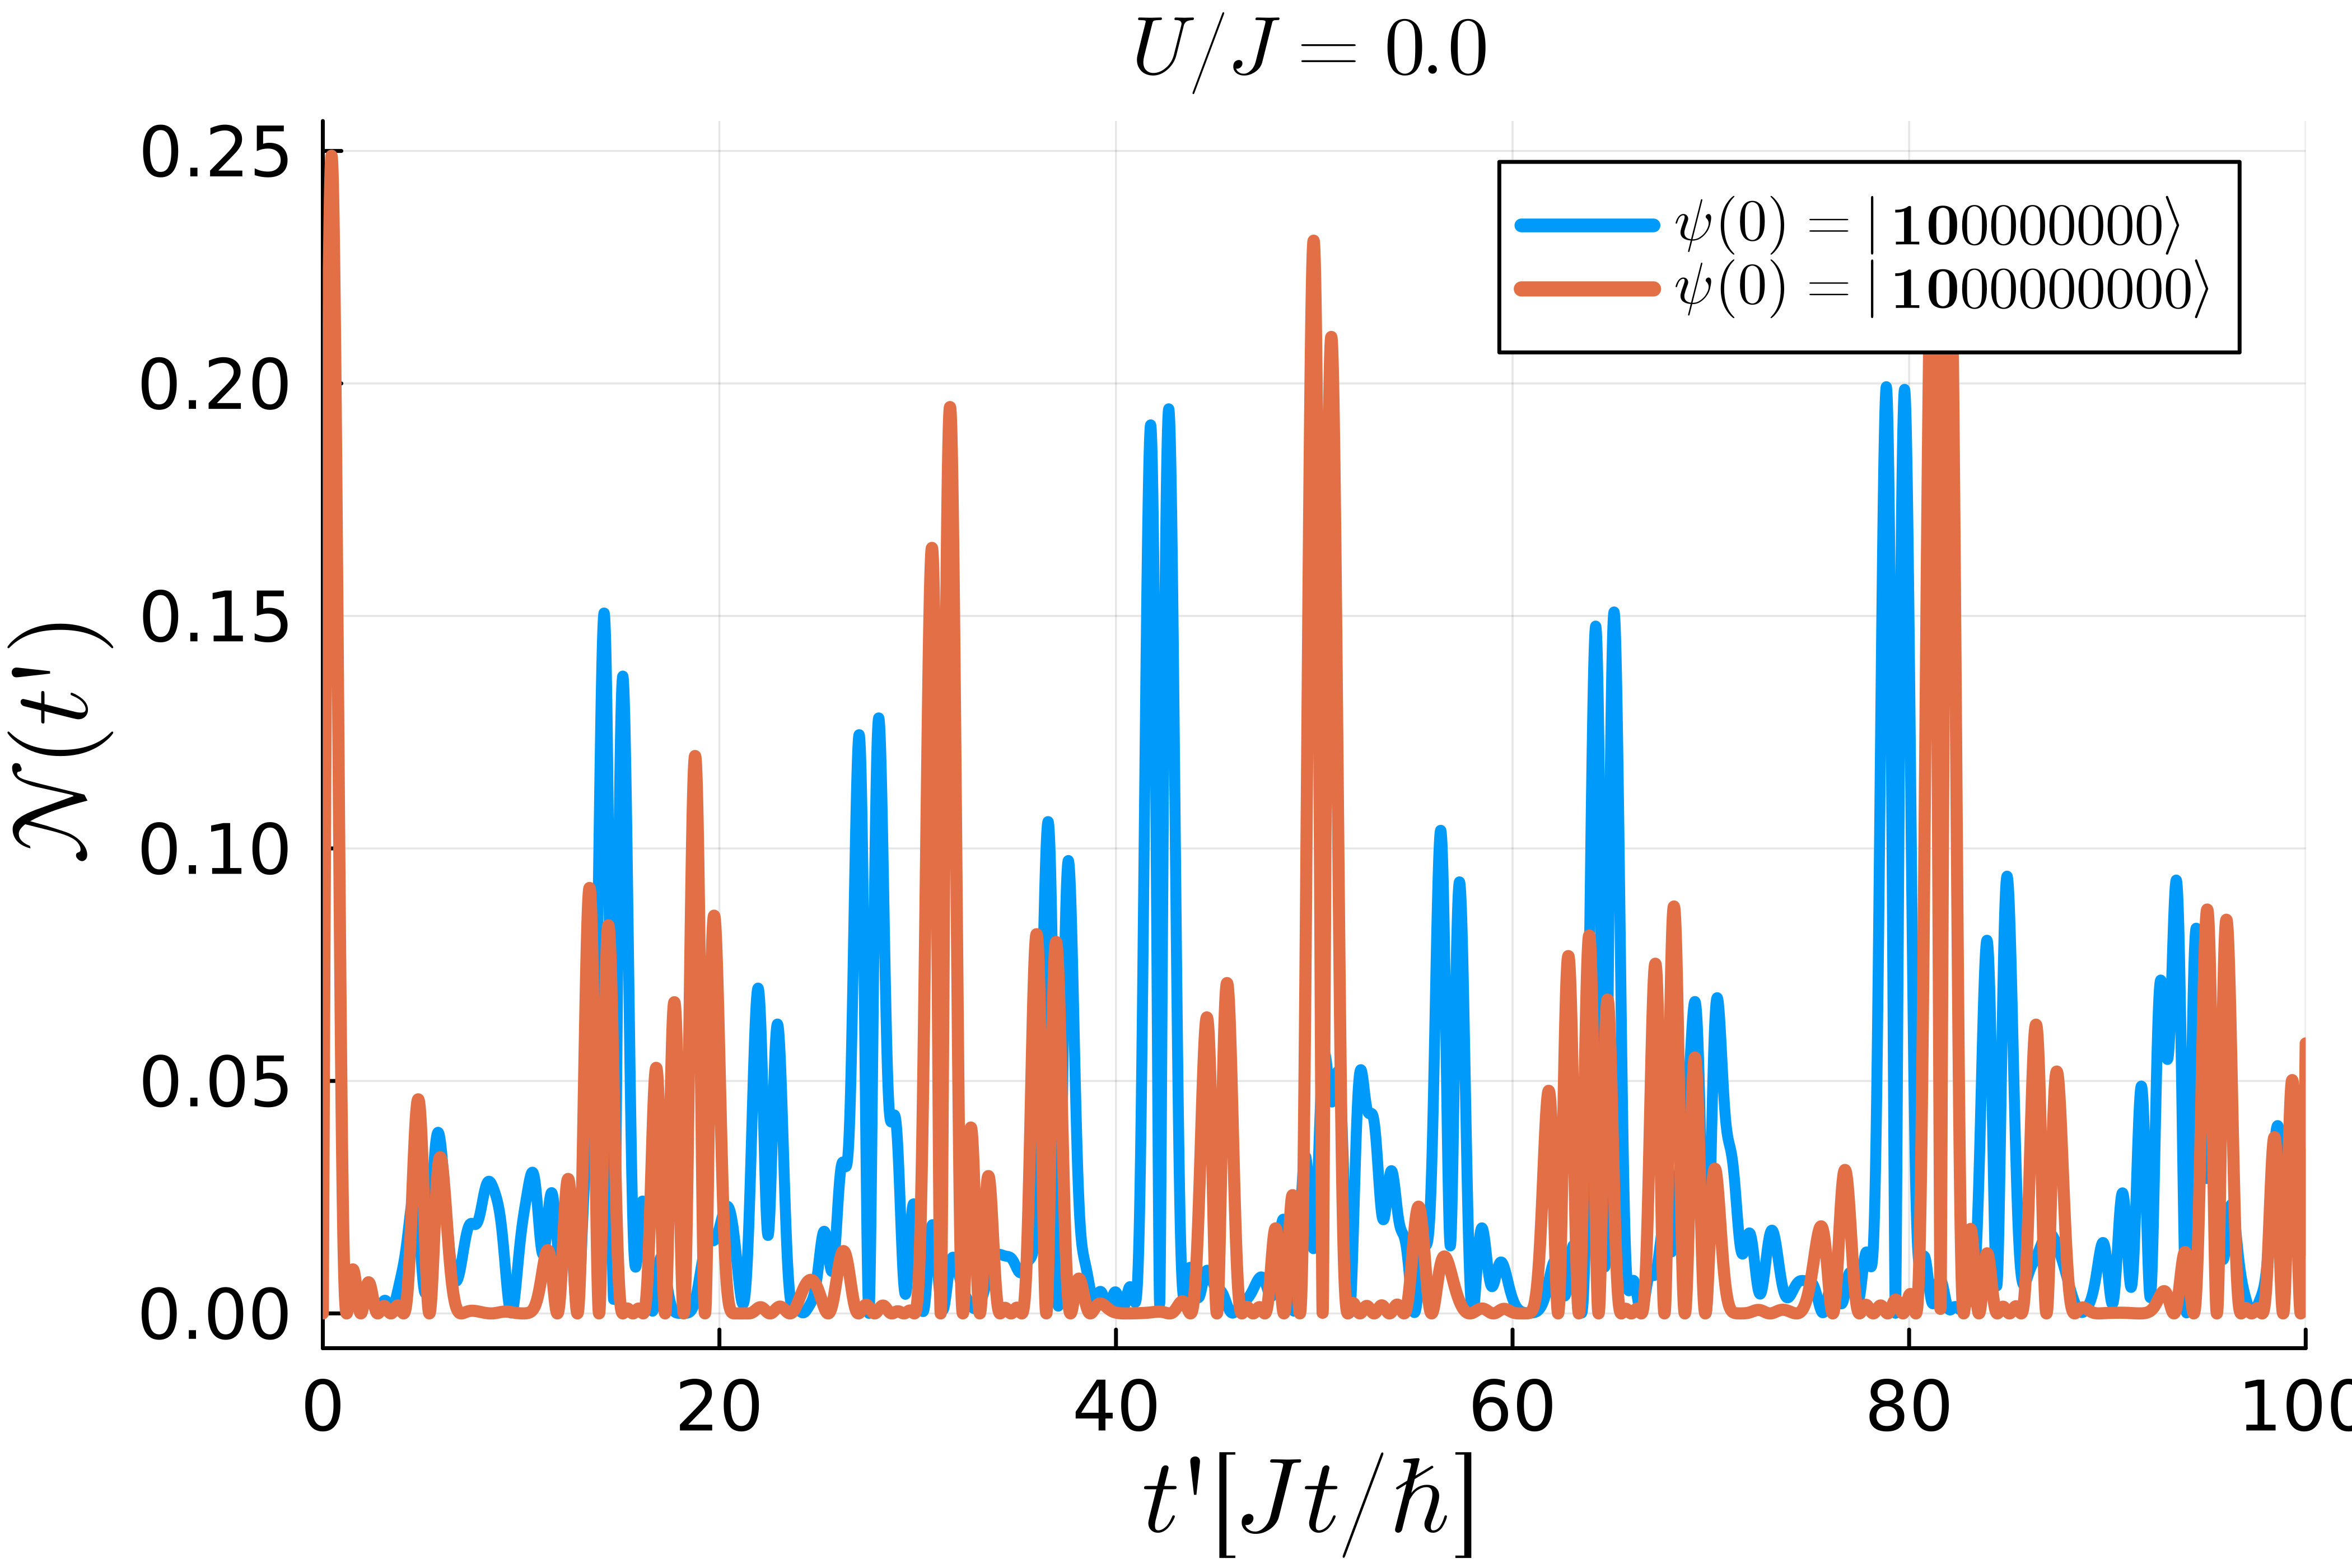

In [108]:
plot(uidefont=fnt,fmt = :png, dpi=700.,
    ylabel=L"\mathcal{N}(t')",xlabel=L"t'[Jt/\hbar]",title=L"U/J=%$(U)",#title=L"N=%$N, M=%$M,  J/U=%$(J)",
    legend=:best,legendfontsize=10,
    xlims=(0,100),tickfontsize=12,
    guidefontsize=18)
    #size = (500, 500))
for i=7:length(CASOS)
    DATA_N=readdlm(direcciones[i])
    #plot!(DATA_N[:,1],DATA_N[:,2],label=L"\psi(0)=|"*NAMES_stylo[i]*L"\rangle",lw=1.0+(i-1)*(2.15))
    if i==-1
         plot!(DATA_N[:,1],DATA_N[:,2],label=L"\psi(0)=|"*NAMES_stylo[i]*L"\rangle",lw=1.0+(i-1)*(1.15),linestyle=:dash)
    else
        plot!(DATA_N[:,1],DATA_N[:,2],label=L"\psi(0)=|"*NAMES_stylo[i]*L"\rangle",lw=1.0+(i-1)*(0.3))
    end
end
plot!()